In [1]:
# FS 2016-09-12, having started with Caleb Madrigal's FFT & SciPy lecture notebooks. 
#
#        * ported to Python 3, e.g. len() and print()
#        * used scipy.io.wavfile to read sound
#        * used matplotlib.pyplot for plotting
#        * // instead of / for integer division

%matplotlib inline 

import numpy as np
import scipy
import scipy.spatial
from scipy.io import wavfile
import pylab
import matplotlib.pyplot as plt


# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 1-D Signal

A single value that changes with respect to time or distance, e.g. sound is a change of air pressure over time.


# What does a sound signal or "sound wave" look like?

Depends on how the air pressure values were acquired and are represented but one way is as follows:

* When value is = 0, the pressure of the air is "normal."
* When value is > 0, the pressure of the air is more than normal.
* When value is < 0, the pressure of the air is less than normal.

# Examples of real sound signals

In [3]:
# Read them in from files and convert them from what whatever format they're stored in into a list of numbers.

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")
(sample_rate_ah, input_signal_ah) = wavfile.read("audio_files/vowel_ah.wav")

print('Number of individual samples in Eh signal is ...', len(input_signal_eh))
print('The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ...', sample_rate_eh)

Number of individual samples in Eh signal is ... 111616
The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ... 44100


In [4]:
# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)
time_array_ah = np.arange(0, len(input_signal_ah)/sample_rate_ah, 1/sample_rate_ah)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)]
time_array_ah = time_array_ah[0:(sample_rate_ah//10)]

input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)]
input_signal_ah = input_signal_ah[0:(sample_rate_eh//10)]


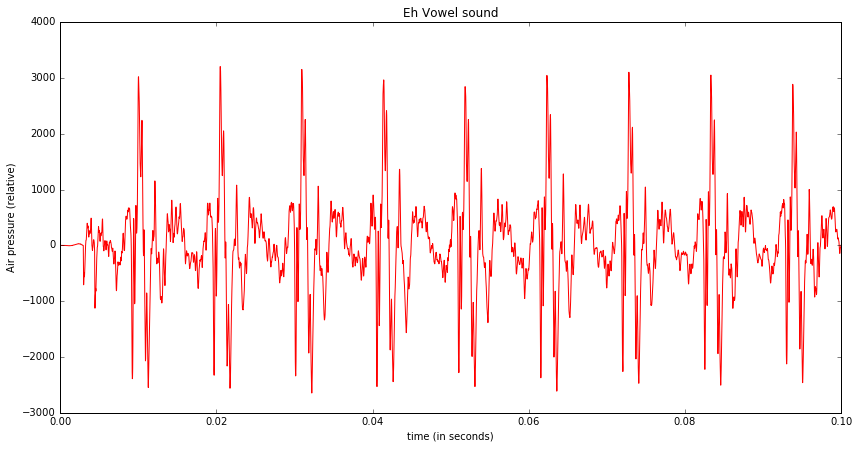

In [5]:
# Plot sound pressure level versus time

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.show()

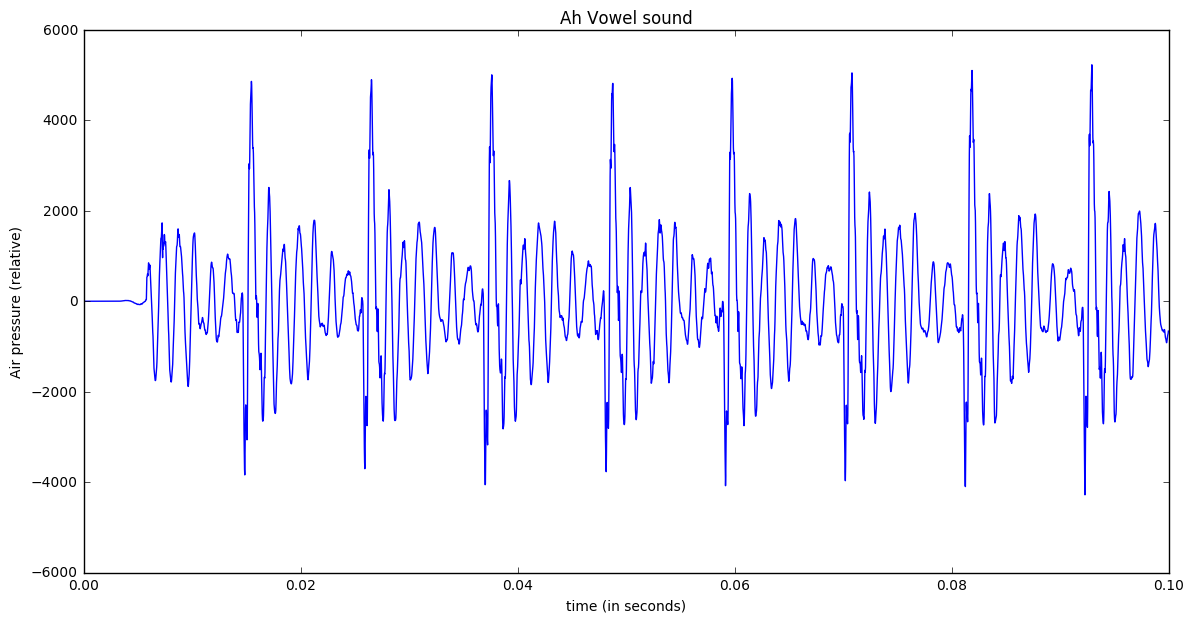

In [20]:
# Plot sound pressure level versus time

setup_graph(title='Ah Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_ah, input_signal_ah,color='b')

plt.show()

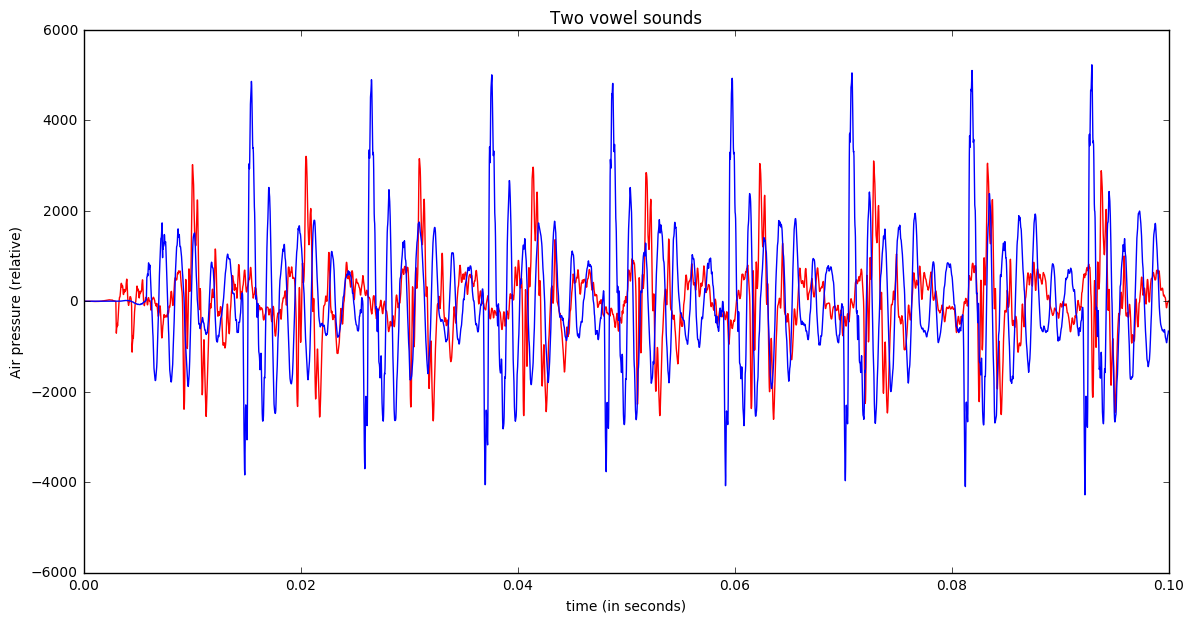

In [21]:
setup_graph(title='Two vowel sounds', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.plot(time_array_ah, input_signal_ah,color='b')

plt.show()

# Euclidean distance  between sounds


In [22]:

print('Euclidean dist. btw. two very different sounds is {:0.3f}'.format(
      scipy.spatial.distance.euclidean(input_signal_eh, input_signal_ah)))
print('Euclidean dist. btw. same sound is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(input_signal_eh, input_signal_eh)))
print('Euclidean dist. btw. same sound, 1 percent different amplitude is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(input_signal_eh, 0.99 * input_signal_eh)))


Euclidean dist. btw. two very different sounds is 108033.285
Euclidean dist. btw. same sound is 0.000
Euclidean dist. btw. same sound, 1 percent different amplitude is 551.607


# Euclidean distance  between normalized sounds


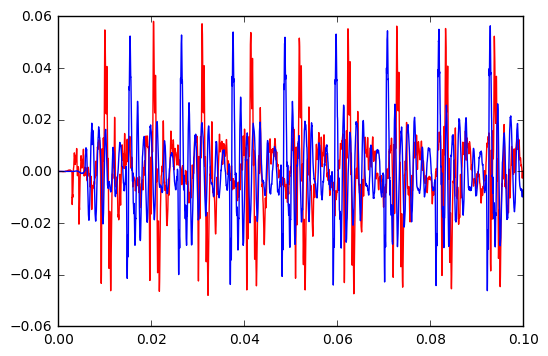

Euclidean dist. btw. two very different normalized sounds is 1.416
Euclidean dist. btw. same normalized sound is 0.000e+00
Euclidean dist. btw. same normalized sound, 1 percent different amplitude is 8.308e-17


In [23]:
# linalg.norm functions don't seem to work with big arrays of integers so convert to floats

f_input_signal_eh = np.asfarray(input_signal_eh)
f_input_signal_ah = np.asfarray(input_signal_ah)

norm_f_input_signal_eh = f_input_signal_eh/np.linalg.norm(f_input_signal_eh)
norm_f_input_signal_ah = f_input_signal_ah/np.linalg.norm(f_input_signal_ah)

plt.plot(time_array_eh, norm_f_input_signal_eh,color='r')
plt.plot(time_array_eh, norm_f_input_signal_ah,color='b')
plt.show()

print('Euclidean dist. btw. two very different normalized sounds is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(norm_f_input_signal_eh, norm_f_input_signal_ah)))
    
print('Euclidean dist. btw. same normalized sound is {:0.3e}'.format(
            scipy.spatial.distance.euclidean(norm_f_input_signal_eh, norm_f_input_signal_eh)))

print('Euclidean dist. btw. same normalized sound, 1 percent different amplitude is {:0.3e}'.format( 
            scipy.spatial.distance.euclidean(norm_f_input_signal_eh, 
                                       (0.99 * f_input_signal_eh)/np.linalg.norm(0.99 * f_input_signal_eh))))


# Cosine similarity between sounds

In [58]:
# print(scipy.spatial.distance.cosine(np.asfarray(input_signal_eh), np.asfarray(0.9 * input_signal_eh))) 
# The above function returns 1 - (cosine similarity.) Could be used as is or used to error-check my own function below.

def FS_Cosine_Similarity (v1, v2):
    return (np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))

print('Cosine Similarity btw. two very different sounds is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, f_input_signal_ah))

print('Cosine Similarity btw. same sound is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, f_input_signal_eh))

print('Cosine Similarity btw. same sound, 1 percent different amplitude is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, 0.99 * f_input_signal_eh))


Cosine Similarity btw. two very different sounds is -1.899E-03
Cosine Similarity btw. same sound is 1.000E+00
Cosine Similarity btw. same sound, 1 percent different amplitude is 1.000E+00


# Product of two different-looking signals

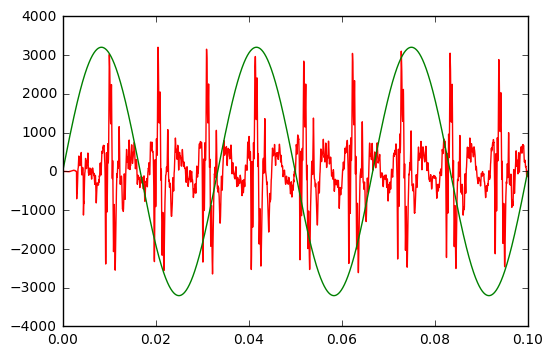

Just to check that sum of pointwise products 3.331E+06  is the same as the dot product 3.331E+06


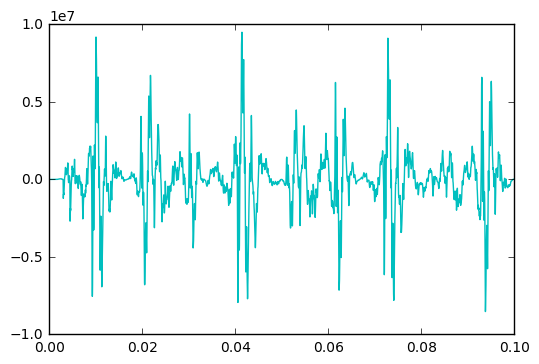

Magnitude of product of the two different-looking signals is 1.279E+08


In [25]:
guessed_cycles = 3 # number of cycles in the 0.1 s period

guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_different = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just to check that sum of pointwise products %0.3E' %np.sum(signal_product_different), 
      ' is the same as the dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_different,color='c')
plt.show()

print('Magnitude of product of the two different-looking signals is %0.3E' %np.linalg.norm(signal_product_different))



# Product of two signals with similar frequencies

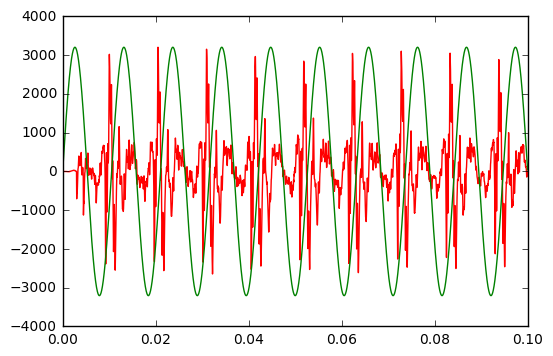

Just checking that sum of pointwise products -4.407E+08  is the same as dot product -4.407E+08


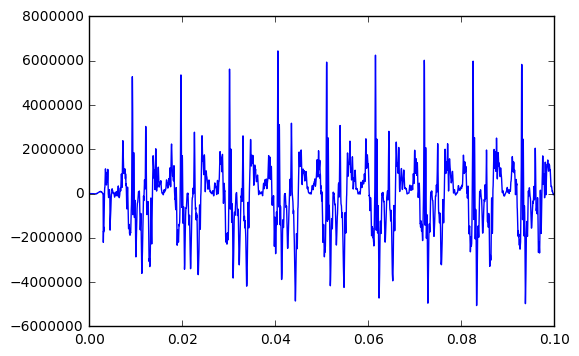

Magnitude of product of the two more signals with similar frequencies is 9.718E+07
This is smaller than magnitude of product of the two different-looking signals which is 1.279E+08


In [26]:
guessed_cycles = 9.5 # number of cycles in the 0.1 s period

guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_freq_similar = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just checking that sum of pointwise products %0.3E' %np.sum(signal_product_freq_similar), 
      ' is the same as dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_freq_similar,color='b')
plt.show()

print('Magnitude of product of the two more signals with similar frequencies is %0.3E' 
      %np.linalg.norm(signal_product_freq_similar))

print('This is smaller than magnitude of product of the two different-looking signals which is %0.3E' 
      %np.linalg.norm(signal_product_different))


# Product of two signals with similar frequencies and phases

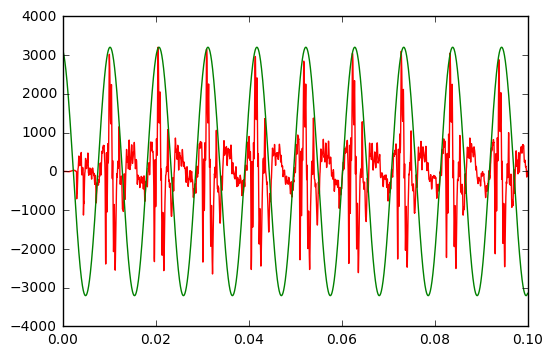

Just checking that sum of pointwise products -1.876E+08  is the same as dot product -1.876E+08


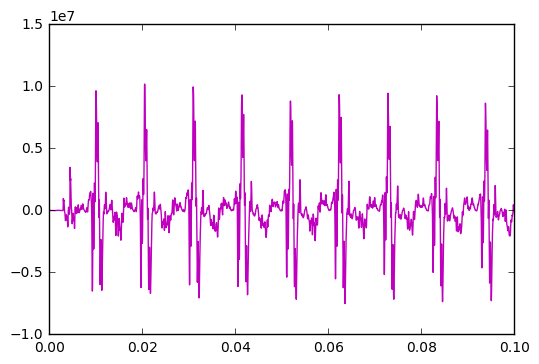

Lab start:
Cosinus wave


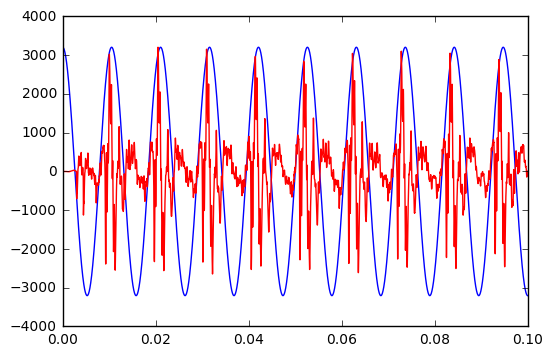

Sinus wave


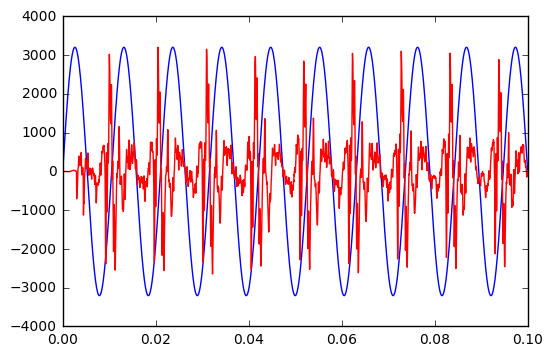

Pointwise product of cos and signal


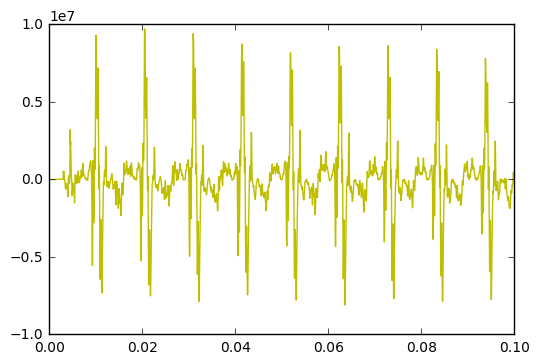

Pointwise product of sin and signal


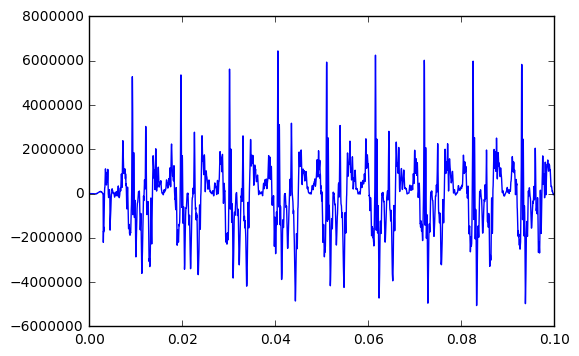

Sum of the two signals absolute values:


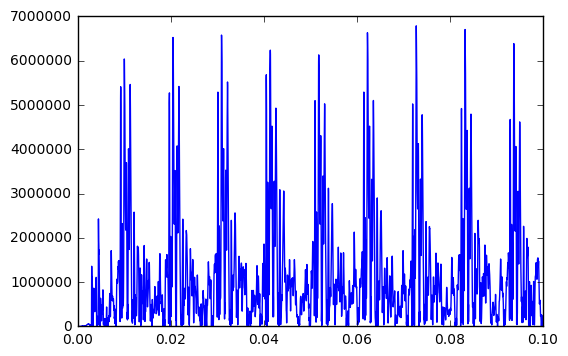

Sum of the two signals is -7.236E+08:  Compered to good signal sum: -1.876E+08
Absolute sum of the wtwo signals is 5.137E+09  Compered to good signal absolute sum: 5.756E+09
Cosine similarity is 0.71596
0.715956012555


In [101]:
guessed_cycles = 9.5 # number of cycles in the 0.1 s period
guessed_phase = (1.25 * 2 * np.pi) / 0.1 # phase shift 


guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh + guessed_phase)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_freq_phase_similar = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just checking that sum of pointwise products %0.3E' %np.sum(signal_product_freq_phase_similar), 
      ' is the same as dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_freq_phase_similar,color='m')
plt.show()

# THE LAB WORK STARTS HERE

# Plot absolute values of the pointwise products of a signal with cosine function of similar frequency

print('Lab start:')

sin_wave = np.sin(guessed_ang_freq * (time_array_eh)) # Generating a sin wave with the simmilar frequnecy

sin_wave = sin_wave * np.amax(f_input_signal_eh) # Scale it to match the actual signal

cos_wave = np.cos(guessed_ang_freq* (time_array_eh)) # Generating a cos wave with the simmilar frequnecy

cos_wave = cos_wave * np.amax(f_input_signal_eh) # Scale it to match the actual signal

#print('Generated COS and SIN with the simillar frequency, but not the phase:')
print('Cosinus wave')
plt.plot(time_array_eh, cos_wave,color='b')
plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.show()
print('Sinus wave')
plt.plot(time_array_eh, sin_wave,color='b')
plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.show()

signal_cos_product = cos_wave * f_input_signal_eh # Pointwise product of signal with cos
signal_sin_product = sin_wave * f_input_signal_eh # Pointwise product of signal with sin

print('Pointwise product of cos and signal')
plt.plot(time_array_eh, signal_cos_product,color='y')
plt.show()
print('Pointwise product of sin and signal')
plt.plot(time_array_eh, signal_sin_product,color='b')
plt.show()

# Plot the sum of the above two plots and compare the plot where both frequency and phase of the sine were a goog match
print('Sum of the two signals absolute values:')
sum_signal = signal_sin_product + signal_cos_product
sum_signal_abs = (np.absolute(signal_sin_product) + np.absolute(signal_cos_product)) / 2  # Sum the two signals
plt.plot(time_array_eh, sum_signal_abs,color='b')
plt.show()

print('Sum of the two signals is %0.3E:'%np.sum(sum_signal), 
      ' Compered to good signal sum: %0.3E' %np.sum(signal_product_freq_phase_similar))
print('Absolute sum of the wtwo signals is %0.3E' %np.sum(sum_signal_abs), 
      ' Compered to good signal absolute sum: %0.3E' %np.sum(np.absolute(signal_product_freq_phase_similar)))


#compare between  sum_signal and signal_product_freq_phase_similar, Don't forget to define Cosine Similarity first
#def FS_Cosine_Similarity (v1, v2):
#    return (np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))

#similarity = FS_Cosine_Similarity(sum_signal, signal_product_freq_phase_similar)

#print('Cosine similarity is %0.5f' %(similarity))
#print(similarity)

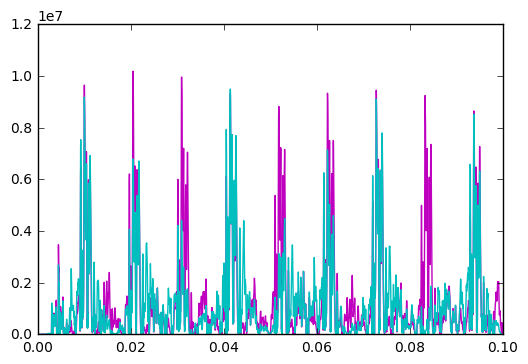

Magnitude of product of the two signals with similar frequencies and phases is 1.502E+08
 ... which should be the same as RSS 1.502E+08
 ... which should be the same as RDP 1.502E+08
Magnitude of product of the two signals with similar frequencies is 9.718E+07
Magnitude of product of the two different-looking signals which is 1.279E+08


In [28]:
plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='m')
plt.plot(time_array_eh, np.sqrt(signal_product_different**2),color='c')
#plt.plot(time_array_eh, np.sqrt(signal_product_freq_similar**2),color='g')

plt.show()

print('Magnitude of product of the two signals with similar frequencies and phases is %0.3E' 
      %np.linalg.norm(signal_product_freq_phase_similar)) 

print(' ... which should be the same as RSS %0.3E'%np.sqrt(np.sum(signal_product_freq_phase_similar**2)))
print(' ... which should be the same as RDP %0.3E'%np.sqrt(np.dot(signal_product_freq_phase_similar, signal_product_freq_phase_similar)))

print('Magnitude of product of the two signals with similar frequencies is %0.3E' 
      %np.linalg.norm(signal_product_freq_similar))

print('Magnitude of product of the two different-looking signals which is %0.3E' 
      %np.linalg.norm(signal_product_different))

# Sum of Signals (or Signal Superposition)

* If you add a bunch of waves together, it forms one wave.
* Hearing me talk while knocking on the desk

# Example

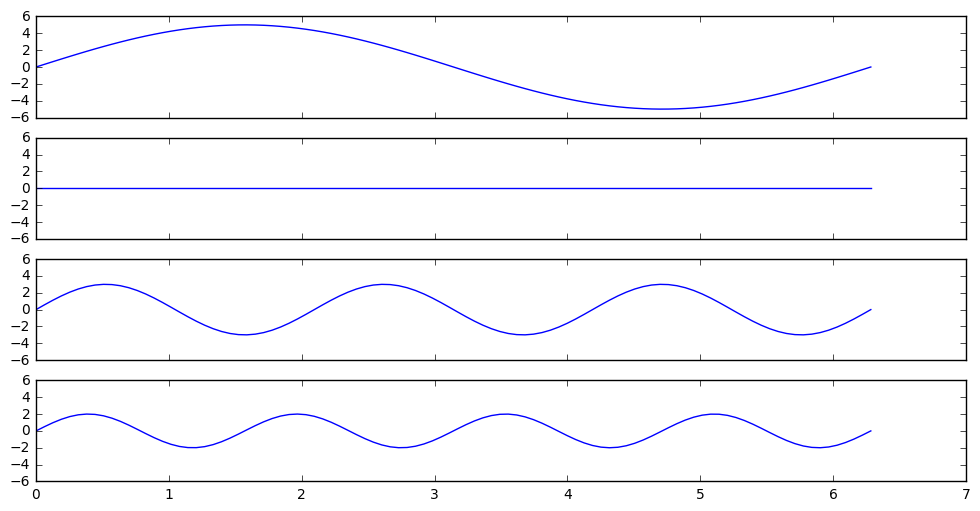

In [29]:
# Two subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 100)

y1 = 5 * np.sin(x)
y2 = 0 * np.sin(2*x)
y3 = 3 * np.sin(3*x)
y4 = 2 * np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)

axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)

_ = plt.show()


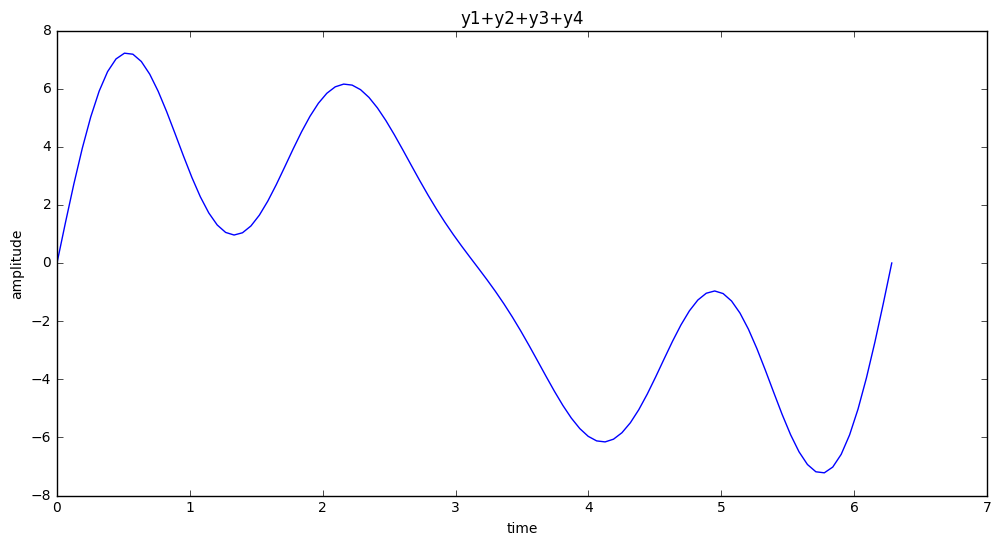

In [30]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', fig_size=(12,6))

complicated_looking_wave = y1 + y2 + y3 + y4

_ = plt.plot(x, complicated_looking_wave)
_ = plt.show()

# Wave Interference Example

### This is how noise-canceling headphones work

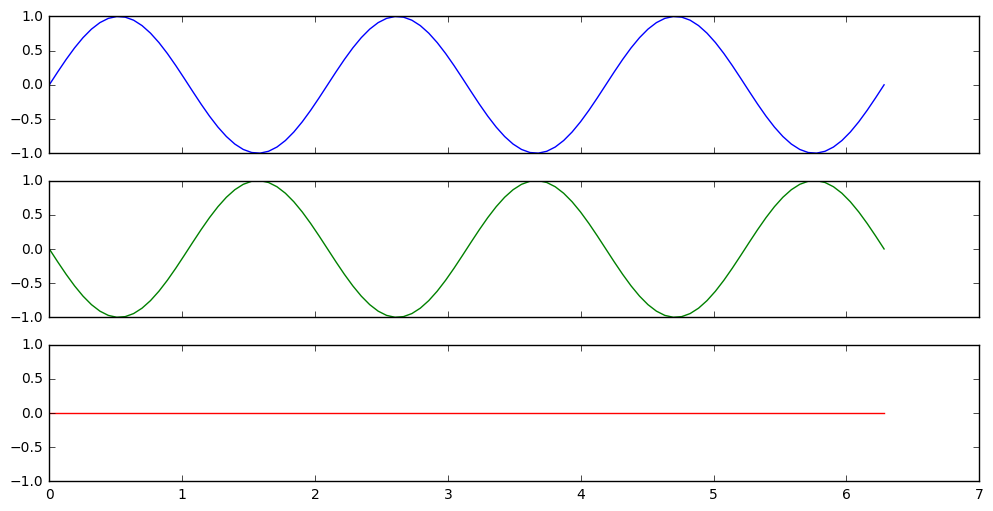

In [31]:
y5 = np.sin(3 * x)
y6 = -1 * np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)

axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y6, 'g')
axarr[2].plot(x, y5 + y6, 'r')

_ = plt.show()